# Plotting retrieved DoLP residuals as a function of matrix noise

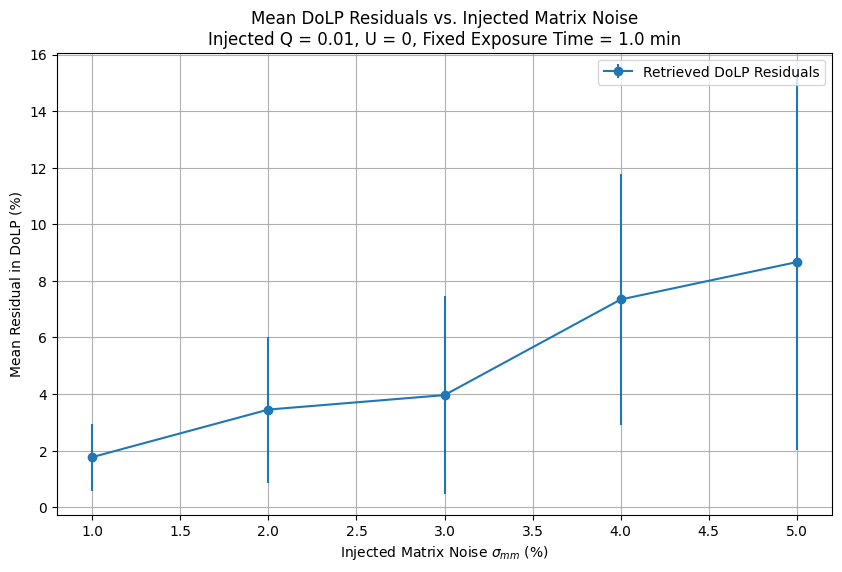

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '../python/')
import angles
import instrument_mm

# Define observer parameters
observer_latitude = 20.0  # Latitude of Mauna Kea in degrees
observer_longitude = -155.5  # Longitude of Mauna Kea in degrees

# Define target parameters (fixed target for this simulation)
target = {"name": "Hamal", "ra": 31.791, "dec": 23.462}  # Hamal (Alpha Arietis)

# Observation date and time
observation_date = "2460614.91667"  # JD for 10/31/2024
observation_time = "10:00:00"   # UT time to get peak at midnight HST

# Fixed integration time and sub-integration time
t_int = 1 * 60  # 1 minute in seconds
sub_tint = 0.5  # 1 second

# Injected polarization
Q_injected = 0.01  # Injected Stokes Q
U_injected = 0  # Injected Stokes U
noise_percentage = 0.1  # Intensity noise

# Matrix noise range
matrix_noise_range = np.arange(1, 6)  # From 1% to 5%
num_trials = 50  # Number of trials per noise level

# Storage for results
mean_residuals = []
std_residuals = []

# Loop over matrix noise levels
for matrix_noise in matrix_noise_range:
    residuals = []

    # Perform multiple trials for each noise level
    for trial in range(num_trials):
        S_in_retrieved = instrument_mm.calculate_input_Q_U_observing_sequence_matrix_inversion(
            ra=target["ra"], 
            dec=target["dec"], 
            observer_latitude=observer_latitude, 
            observer_longitude=observer_longitude, 
            jd_str=observation_date, 
            ut_start=observation_time, 
            t_int=t_int, 
            Q=Q_injected, 
            U=U_injected, 
            delta_HWP=0.5,
            noise_percentage=noise_percentage,
            include_V=False,
            sub_tint=sub_tint,  # Sub-integration time in seconds
            TMT_matrix_noise=matrix_noise,
            NFIRAOS_matrix_noise=matrix_noise,
            MODHIS_matrix_noise=matrix_noise,
            observable="intensities"  # Or "single_difference" if needed
        )
        
        # Calculate retrieved polarization
        Q_retrieved, U_retrieved = S_in_retrieved[1], S_in_retrieved[2]
        retrieved_polarization = np.sqrt(Q_retrieved**2 + U_retrieved**2)
        injected_polarization = np.sqrt(Q_injected**2 + U_injected**2)
        
        # Calculate residuals as a percentage
        residual = 100 * np.abs(injected_polarization - retrieved_polarization) / injected_polarization
        residuals.append(residual)

    # Compute mean and standard deviation of residuals for this noise level
    mean_residuals.append(np.mean(residuals))
    std_residuals.append(np.std(residuals))

# Plot the results
plt.figure(figsize=(10, 6))
plt.errorbar(matrix_noise_range, mean_residuals, yerr=std_residuals, fmt='-o', label='Retrieved DoLP Residuals')
plt.xlabel(r"Injected Matrix Noise $\sigma_{mm}$ (%)")
plt.ylabel("Retrieved DoLP Residuals (%)")
plt.title(
    f"Retrieved DoLP Residuals vs. Injected Matrix Noise\n"
    f"Injected Q = {Q_injected}, U = {U_injected}, Exposure Time = {t_int / 60:.1f} min, Supersampled Timestep = " + str(sub_tint) 
)
plt.grid(True)
plt.legend()
plt.show()


# Looping over Multiple Targets

Saved residuals to Hamal_residuals_matrix_noise_1_tint_60_sub_tint_0.5.npy
Saved residuals to Hamal_residuals_matrix_noise_2_tint_60_sub_tint_0.5.npy
Saved residuals to Hamal_residuals_matrix_noise_3_tint_60_sub_tint_0.5.npy
Saved residuals to Hamal_residuals_matrix_noise_4_tint_60_sub_tint_0.5.npy
Saved residuals to Hamal_residuals_matrix_noise_5_tint_60_sub_tint_0.5.npy


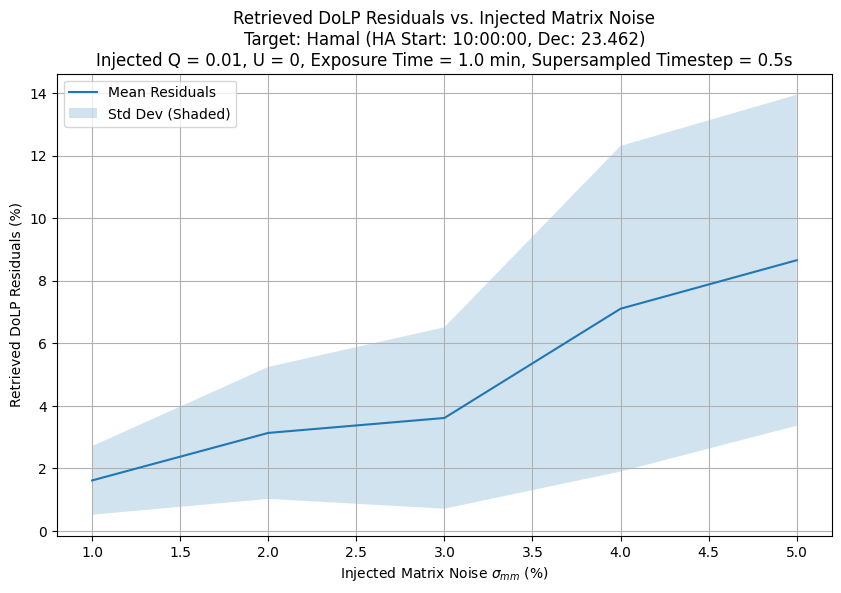

Saved residuals to Mirfak_residuals_matrix_noise_1_tint_60_sub_tint_0.5.npy
Saved residuals to Mirfak_residuals_matrix_noise_2_tint_60_sub_tint_0.5.npy
Saved residuals to Mirfak_residuals_matrix_noise_3_tint_60_sub_tint_0.5.npy
Saved residuals to Mirfak_residuals_matrix_noise_4_tint_60_sub_tint_0.5.npy
Saved residuals to Mirfak_residuals_matrix_noise_5_tint_60_sub_tint_0.5.npy


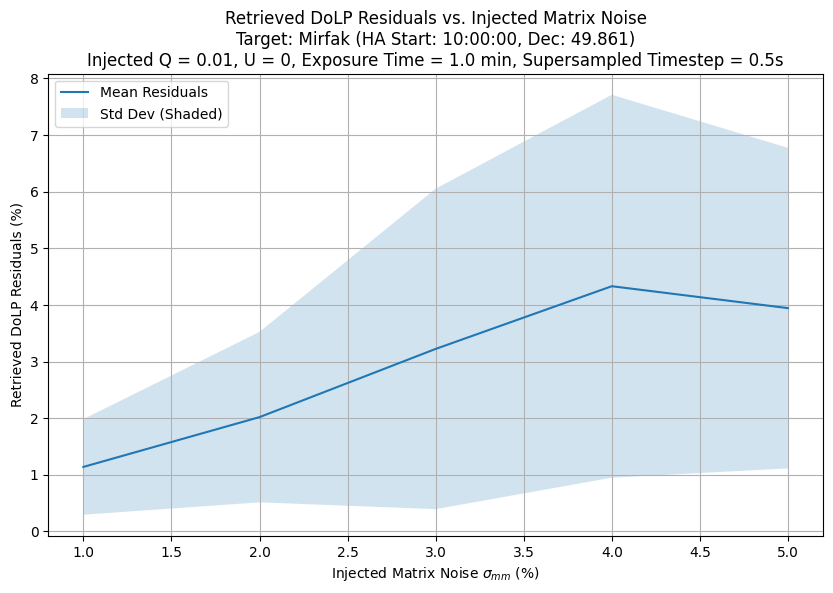

Saved residuals to Polaris_residuals_matrix_noise_1_tint_60_sub_tint_0.5.npy
Saved residuals to Polaris_residuals_matrix_noise_2_tint_60_sub_tint_0.5.npy
Saved residuals to Polaris_residuals_matrix_noise_3_tint_60_sub_tint_0.5.npy
Saved residuals to Polaris_residuals_matrix_noise_4_tint_60_sub_tint_0.5.npy
Saved residuals to Polaris_residuals_matrix_noise_5_tint_60_sub_tint_0.5.npy


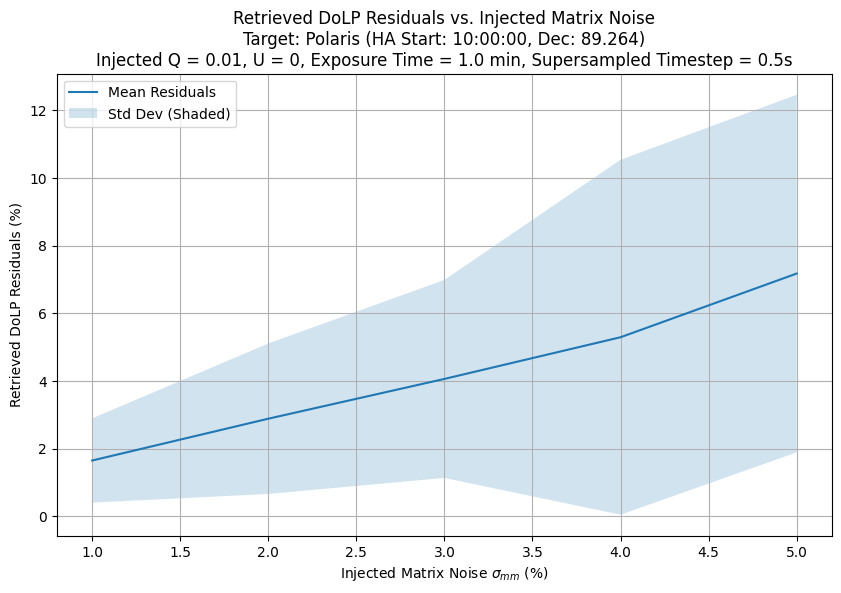

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '../python/')
import angles
import instrument_mm

# Define observer parameters
observer_latitude = 20.0  # Latitude of Mauna Kea in degrees
observer_longitude = -155.5  # Longitude of Mauna Kea in degrees

# Define target parameters
targets = [
    {"name": "Hamal", "ra": 31.791, "dec": 23.462},  # Hamal (Alpha Arietis)
    {"name": "Mirfak", "ra": 51.079, "dec": 49.861},  # Mirfak (Alpha Persei)
    {"name": "Polaris", "ra": 37.954, "dec": 89.264},  # Polaris (Alpha Ursae Minoris)
]

# Observation date and time
observation_date = "2460614.91667"  # JD for 10/31/2024
observation_time = "10:00:00"   # UT time to get peak at midnight HST

# Fixed integration time and sub-integration time
t_int = 1 * 60  # 1 minute in seconds
sub_tint = 0.5  # 0.5 seconds

# Injected polarization
Q_injected = 0.01  # Injected Stokes Q
U_injected = 0  # Injected Stokes U
noise_percentage = 0.1  # Intensity noise

# Matrix noise range
matrix_noise_range = np.arange(1, 6)  # From 1% to 5%
num_trials = 50  # Number of trials per noise level

# Loop over each target
for target in targets:
    mean_residuals = []
    std_residuals = []

    # Loop over matrix noise levels
    for matrix_noise in matrix_noise_range:
        residuals = []

        # Perform multiple trials for each noise level
        for trial in range(num_trials):
            S_in_retrieved = instrument_mm.calculate_input_Q_U_observing_sequence_matrix_inversion(
                ra=target["ra"], 
                dec=target["dec"], 
                observer_latitude=observer_latitude, 
                observer_longitude=observer_longitude, 
                jd_str=observation_date, 
                ut_start=observation_time, 
                t_int=t_int, 
                Q=Q_injected, 
                U=U_injected, 
                delta_HWP=0.5,
                noise_percentage=noise_percentage,
                include_V=False,
                sub_tint=sub_tint,  # Sub-integration time in seconds
                TMT_matrix_noise=matrix_noise,
                NFIRAOS_matrix_noise=matrix_noise,
                MODHIS_matrix_noise=matrix_noise,
                observable="intensities"  # Or "single_difference" if needed
            )
            
            # Calculate retrieved polarization
            Q_retrieved, U_retrieved = S_in_retrieved[1], S_in_retrieved[2]
            retrieved_polarization = np.sqrt(Q_retrieved**2 + U_retrieved**2)
            injected_polarization = np.sqrt(Q_injected**2 + U_injected**2)
            
            # Calculate residuals as a percentage
            residual = 100 * np.abs(injected_polarization - retrieved_polarization) / injected_polarization
            residuals.append(residual)

        # Compute mean and standard deviation of residuals for this noise level
        mean_residuals.append(np.mean(residuals))
        std_residuals.append(np.std(residuals))

        # Save the residuals as a .npy file
        filename = f"{target['name']}_residuals_matrix_noise_{matrix_noise}_tint_{t_int}_sub_tint_{sub_tint}.npy"
        np.save(filename, np.array(residuals))
        print(f"Saved residuals to {filename}")

    # Plot the results for this target
    plt.figure(figsize=(10, 6))
    mean_residuals = np.array(mean_residuals)
    std_residuals = np.array(std_residuals)
    plt.plot(matrix_noise_range, mean_residuals, label=f"Mean Residuals")
    plt.fill_between(matrix_noise_range, mean_residuals - std_residuals, mean_residuals + std_residuals, alpha=0.2, label="Std Dev (Shaded)")
    plt.xlabel(r"Injected Matrix Noise $\sigma_{mm}$ (%)")
    plt.ylabel("Retrieved DoLP Residuals (%)")
    plt.title(
        f"Retrieved DoLP Residuals vs. Injected Matrix Noise\n"
        f"Target: {target['name']} (HA Start: {observation_time}, Dec: {target['dec']})\n"
        f"Injected Q = {Q_injected}, U = {U_injected}, Exposure Time = {t_int / 60:.1f} min, Supersampled Timestep = " + str(sub_tint) + "s"
    )
    plt.grid(True)
    plt.legend()
    plt.show()


# Changing Exposure Time to 10 mins

Saved residuals to Hamal_residuals_matrix_noise_1_tint_60_sub_tint_1_readout_noise_0.npy
Saved residuals to Hamal_residuals_matrix_noise_2_tint_60_sub_tint_1_readout_noise_0.npy
Saved residuals to Hamal_residuals_matrix_noise_3_tint_60_sub_tint_1_readout_noise_0.npy
Saved residuals to Hamal_residuals_matrix_noise_4_tint_60_sub_tint_1_readout_noise_0.npy
Saved residuals to Hamal_residuals_matrix_noise_5_tint_60_sub_tint_1_readout_noise_0.npy


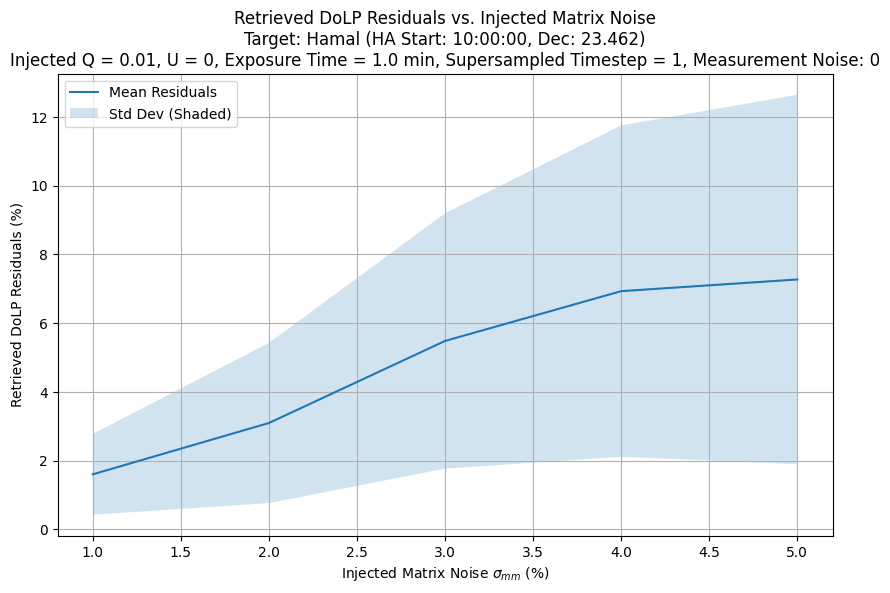

Saved residuals to Mirfak_residuals_matrix_noise_1_tint_60_sub_tint_1_readout_noise_0.npy
Saved residuals to Mirfak_residuals_matrix_noise_2_tint_60_sub_tint_1_readout_noise_0.npy
Saved residuals to Mirfak_residuals_matrix_noise_3_tint_60_sub_tint_1_readout_noise_0.npy
Saved residuals to Mirfak_residuals_matrix_noise_4_tint_60_sub_tint_1_readout_noise_0.npy
Saved residuals to Mirfak_residuals_matrix_noise_5_tint_60_sub_tint_1_readout_noise_0.npy


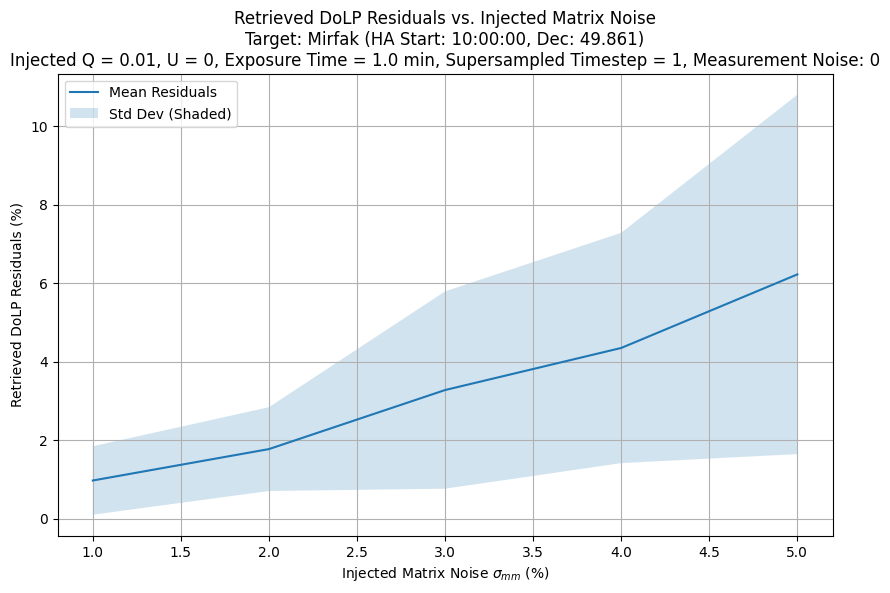

Saved residuals to Polaris_residuals_matrix_noise_1_tint_60_sub_tint_1_readout_noise_0.npy
Saved residuals to Polaris_residuals_matrix_noise_2_tint_60_sub_tint_1_readout_noise_0.npy
Saved residuals to Polaris_residuals_matrix_noise_3_tint_60_sub_tint_1_readout_noise_0.npy
Saved residuals to Polaris_residuals_matrix_noise_4_tint_60_sub_tint_1_readout_noise_0.npy
Saved residuals to Polaris_residuals_matrix_noise_5_tint_60_sub_tint_1_readout_noise_0.npy


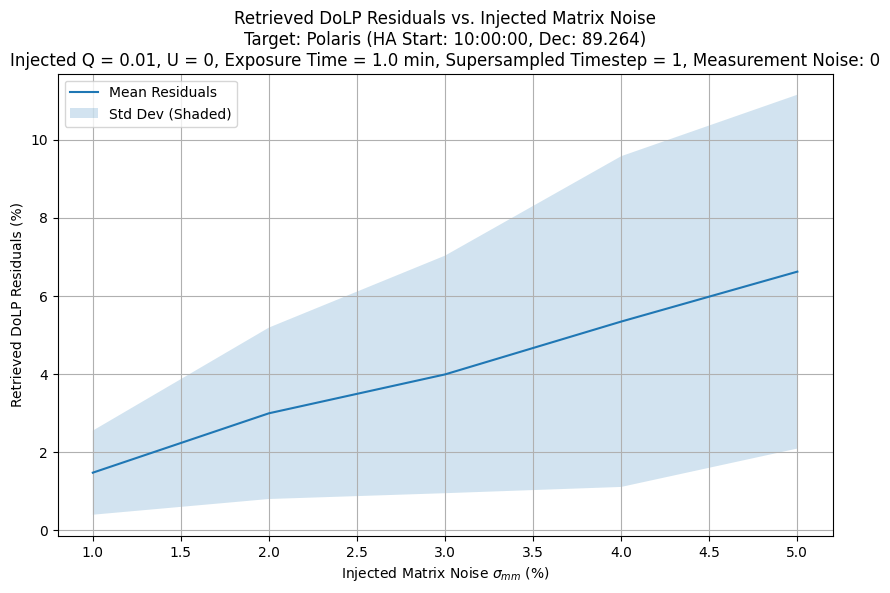

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '../python/')
import angles
import instrument_mm

# Define observer parameters
observer_latitude = 20.0  # Latitude of Mauna Kea in degrees
observer_longitude = -155.5  # Longitude of Mauna Kea in degrees

# Define target parameters
targets = [
    {"name": "Hamal", "ra": 31.791, "dec": 23.462},  # Hamal (Alpha Arietis)
    {"name": "Mirfak", "ra": 51.079, "dec": 49.861},  # Mirfak (Alpha Persei)
    {"name": "Polaris", "ra": 37.954, "dec": 89.264},  # Polaris (Alpha Ursae Minoris)
]

# Observation date and time
observation_date = "2460614.91667"  # JD for 10/31/2024
observation_time = "10:00:00"   # UT time to get peak at midnight HST

# Fixed integration time and sub-integration time
t_int = 1 * 60  # 1 minute in seconds
sub_tint = 1  # 0.5 seconds

# Injected polarization
Q_injected = 0.01  # Injected Stokes Q
U_injected = 0  # Injected Stokes U
noise_percentage = 0  # Intensity noise

# Matrix noise range
matrix_noise_range = np.arange(1, 6)  # From 1% to 5%
num_trials = 50  # Number of trials per noise level

# Loop over each target
for target in targets:
    mean_residuals = []
    std_residuals = []

    # Loop over matrix noise levels
    for matrix_noise in matrix_noise_range:
        residuals = []

        # Perform multiple trials for each noise level
        for trial in range(num_trials):
            S_in_retrieved = instrument_mm.calculate_input_Q_U_observing_sequence_matrix_inversion(
                ra=target["ra"], 
                dec=target["dec"], 
                observer_latitude=observer_latitude, 
                observer_longitude=observer_longitude, 
                jd_str=observation_date, 
                ut_start=observation_time, 
                t_int=t_int, 
                Q=Q_injected, 
                U=U_injected, 
                delta_HWP=0.5,
                noise_percentage=noise_percentage,
                include_V=False,
                sub_tint=sub_tint,  # Sub-integration time in seconds
                TMT_matrix_noise=matrix_noise,
                NFIRAOS_matrix_noise=matrix_noise,
                MODHIS_matrix_noise=matrix_noise,
                observable="intensities"  # Or "single_difference" if needed
            )
            
            # Calculate retrieved polarization
            Q_retrieved, U_retrieved = S_in_retrieved[1], S_in_retrieved[2]
            retrieved_polarization = np.sqrt(Q_retrieved**2 + U_retrieved**2)
            injected_polarization = np.sqrt(Q_injected**2 + U_injected**2)
            
            # Calculate residuals as a percentage
            residual = 100 * np.abs(injected_polarization - retrieved_polarization) / injected_polarization
            residuals.append(residual)

        # Compute mean and standard deviation of residuals for this noise level
        mean_residuals.append(np.mean(residuals))
        std_residuals.append(np.std(residuals))

        # Save the residuals as a .npy file
        filename = f"{target['name']}_residuals_matrix_noise_{matrix_noise}_tint_{t_int}_sub_tint_{sub_tint}_readout_noise_{noise_percentage}.npy"
        np.save(filename, np.array(residuals))
        print(f"Saved residuals to {filename}")

    # Plot the results for this target
    plt.figure(figsize=(10, 6))
    mean_residuals = np.array(mean_residuals)
    std_residuals = np.array(std_residuals)
    plt.plot(matrix_noise_range, mean_residuals, label=f"Mean Residuals")
    plt.fill_between(matrix_noise_range, mean_residuals - std_residuals, mean_residuals + std_residuals, alpha=0.2, label="Std Dev (Shaded)")
    plt.xlabel(r"Injected Matrix Noise $\sigma_{mm}$ (%)")
    plt.ylabel("Retrieved DoLP Residuals (%)")
    plt.title(
        f"Retrieved DoLP Residuals vs. Injected Matrix Noise\n"
        f"Target: {target['name']} (HA Start: {observation_time}, Dec: {target['dec']})\n"
        f"Injected Q = {Q_injected}, U = {U_injected}, Exposure Time = {t_int / 60:.1f} min, Supersampled Timestep = " + str(sub_tint)  + ", Measurement Noise: " + str(noise_percentage)
    )
    plt.grid(True)
    plt.legend()
    plt.show()
